# Inheritance

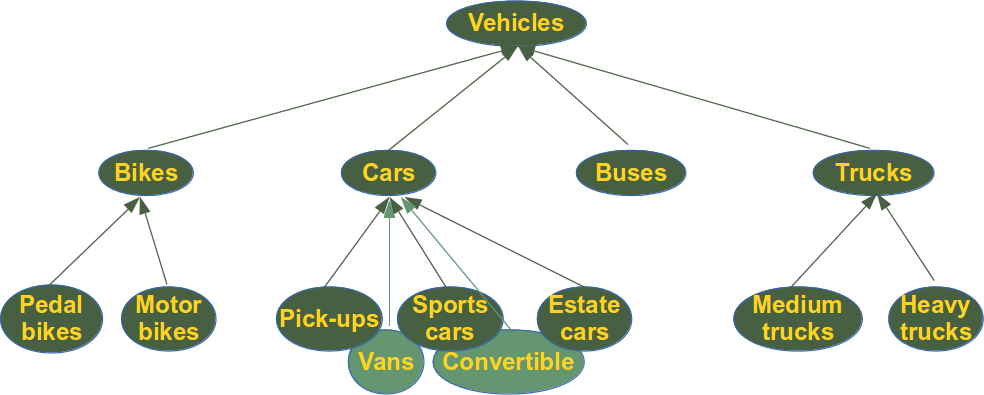

Reusable + logical

The inheriting class is called the **```parent class```**, and the other one is called the **```child class```**

In python, inheritence is done via the following simple syntax

```python
class BaseClass:
  "Body of base class"

class DerivedClass(BaseClass):
  "Body of derived class"

```

Derived class inherits features from the base class, adding new features to it. This results into re-usability of code.


In [1]:
class Parent(object):
    def __init__(self):
        self.__value = 5

    def set_value(self,v):
        self.__value = v
        
    def get_value(self):
        return self.__value

class Child(Parent):
    pass

In [2]:
c1 = Child()
print(c1.get_value())

5


In [3]:
c1.set_value(10)
print(c1.get_value())

10


In [4]:
c = Child()
p = Parent()

print(p.__dict__)

{'_Parent__value': 5}


In [5]:
print(c.__dict__)

{'_Parent__value': 5}


### Let's create a simple class and demonstrate on it what the inheritance is.  A polygon is a closed figure with 3 or more sides. Say, we have a class called Polygon defined as follows.

In [6]:
class Polygon:
    def __init__(self, n_of_sides):
        self.n = n_of_sides
        self.sides = list()

    def input_sides(self, sides: list):
        self.sides = sides

    def disp_sides(self):
        for i in range(self.n):
            print("Side",i+1,"is",self.sides[i])

In [7]:
# create the poligon object and provide the number of sides
p = Polygon(5)

In [8]:
p.sides

[]

In [9]:
# input the length of sides
p.input_sides([1, 5, 10, 5, 6])

In [10]:
p.sides

[1, 5, 10, 5, 6]

In [11]:
# display the length of sides
p.disp_sides()

Side 1 is 1
Side 2 is 5
Side 3 is 10
Side 4 is 5
Side 5 is 6


Many familiar shapes are poligons, like triangle. Let's now define ```triangle``` class, using ```polygon```

In [12]:
class Triangle(Polygon):
    def __init__(self):
        Polygon.__init__(self,3)

    def find_p(self):
        a, b, c = self.sides
        p = a+b+c
        print('The perimeter of the triangle is %s' %p)

Triangle has a new method ```find_p()``` to find and print the perimeter of the triangle. But most of its code it inherits from ```polygon``` class. 

In [13]:
t = Triangle()
t

We can readily use ```input_sides``` function from the class ```Polyndrome```, tough we never defined it in class ```Triangle``` but inherited it from the ```Polyndrome``` class

In [14]:
t.input_sides([3, 4, 5])

In [15]:
t.disp_sides()

Side 1 is 3
Side 2 is 4
Side 3 is 5


In [16]:
t.find_p()

The perimeter of the triangle is 12


# Method Overriding
In the above example, notice that ```__init__()``` method was defined in both classes, ```Triangle``` as well ```Polygon```. When this happens, the method in the derived class overrides that in the base class. This is to say, ```__init__()``` in ```Triangle``` gets preference over the same in ```Polygon```. This in programming is called overriding. <br> 
And not only ```__init__()``` function. One can override any funciton from the parent class.


A better option would be to use the built-in function ```super()```. So, ```super().__init__(3)``` is equivalent to ```Polygon.__init__(self,3)``` and is preferred. 

In [17]:
class Triangle(Polygon):
    def __init__(self):
        super().__init__(3)

    def find_p(self):
        a, b, c = self.sides
        p = a+b+c
        print('The perimeter of the triangle is %0.2f' %p)
        
    #We overrided this method
    def disp_sides(self):
        for i in range(self.n):
            print("Triangle side",i+1,"is",self.sides[i])

In [18]:
t = Triangle()
t.input_sides([3,4,5])
t.disp_sides()

Triangle side 1 is 3
Triangle side 2 is 4
Triangle side 3 is 5


### ```isinstance()```, ```issubclass()```

Two built-in functions ```isinstance()``` and ```issubclass()``` are used to check inheritances. Function ```isinstance()``` returns ```True``` if the object is an instance of the class or other classes derived from it. Each and every class in Python inherits from the base class ```object```.

In [19]:
print(isinstance(t, Triangle))
print(isinstance(t, Polygon))
print(isinstance(t, object))

print(issubclass(Triangle, Polygon))
print(issubclass(object, Triangle))

True
True
True
True
False


In [22]:
print(Polygon.__bases__[0]) #base class of Polygon class
print(Triangle.__bases__[0]) #base class of Triangle class
print(Triangle.__bases__[0].__bases__[0]) #base class of base class of Triangle

<class 'object'>
<class '__main__.Polygon'>
<class 'object'>


# Inheritance types

## a. Single Inheritance

In [23]:
class fruit:
    def __init__(self):
        print("I'm a fruit") 
        
class citrus(fruit):
    def __init__(self):
        super().__init__()
        print("I'm citrus")   

In [24]:
lime=citrus()

I'm a fruit
I'm citrus


## b. Multiple inheritance

In [25]:
class Color:
    pass
                
class Fruit:
    pass
                
class Orange(Color,Fruit):
    pass

In [26]:
issubclass(Orange,Color)

True

In [27]:
issubclass(Orange,Fruit)

True

In [28]:
import inspect
inspect.getmro(Orange)

(__main__.Orange, __main__.Color, __main__.Fruit, object)

In [32]:
class Color:
    def __init__(self, name):
        self.name = name
    def printc(self):
        print(self.name, "is a nice color.")
                
class Fruit:
    def __init__(self, name):
        self.fruitname = name
    def printf(self):
        print(self.fruitname, "is a tasty fruit.")
        
class Orange(Color,Fruit):
    def __init__(self, color, name):
        Color.__init__(self,color)
        Fruit.__init__(self,name)
   

In [31]:
o1 = Orange("red", "orange")
o1.printc()
o1.printf()

red is a nice color.
orange is a tasty fruit.


## c. Hierarchical Inheritance

In [33]:
class Fruit:
    def __init__(self, name):
        self.fruitname = name
    def printf(self):
        print(self.fruitname, "is a tasty fruit.")
        
class Orange(Fruit):
    def __init__(self, name):
        Fruit.__init__(self,name)
    def printOrange(self):
        print(Fruit.printf(self))
        
class Apple(Fruit):
    def __init__(self, name):
        Fruit.__init__(self,name)
 

In [34]:
o1 = Orange("orange")
a1 = Apple("apple")
a1.printf()

apple is a tasty fruit.


In [37]:
class Fruit:
    def __init__(self, name):
        self.fruitname = name
    def printf(self):
        print(self.fruitname, "is a tasty fruit.")
        
class Orange(Fruit):
    def __init__(self, name):
        Fruit.__init__(self,name)
    def printOrange(self):
        print(Fruit.printf(self))
    """def printf(self):
        print("this is a different printf")"""
        
class Apple(Fruit):
    def __init__(self, name):
        Fruit.__init__(self,name)
 

In [38]:
o1 = Orange("orange")
o1.printf()

orange is a tasty fruit.


## d. Multilevel Inheritance

In [39]:
class A:
    x=10
class B(A):
    pass
class C(B):
    pass

In [40]:
obj1=C()
obj1.x

10

## Hybrid Inheritance

In [41]:
class A:
    x=1   
    
class B(A):
    def say(self):
        print("B said")
  
   

class C(A):
    def say(self):
        print("C said")
    
   

class D(B,C):
    
    pass

In [42]:
obj1=D()
obj1.say()

B said


## Super() function

In [43]:
class Vehicle:
    
    def start(self):
        print("Starting engine")
        
    def stop(self):
        print("Stopping engine")
        
        
class TwoWheeler(Vehicle):
    def say(self):
        super().start()
        print("I have two wheels")
        super().stop() 
        
Pulsar=TwoWheeler()
Pulsar.say()

Starting engine
I have two wheels
Stopping engine


In [46]:
class A:
    x=1   
    
class B(A):
    def say(self):
        print('in b')

class C(A):
    def say(self):
        print('in c')
    

class D(C, B):
    def __init__(self):
        super().say()
    

In [47]:
a = D()

in c


In [48]:
class A:
    x=1   
    
class B(A):
    def say(self):
        print('in b')

class C(A):
    def say(self):
        print('in c')
    

class D(C, B):
    def __init__(self):
        B.say(self)

In [49]:
a = D()

in b


# Polymorphism - method overriding/overloading

## More on Method overriding

In [50]:
class A:
    def sayhi(self):
        print("I'm in A")   
        
class B(A):
    def sayhi(self):
        print("I'm in B") 

In [51]:
obj1=B()
obj1.sayhi()

I'm in B


In [52]:
class A:
    def sayhi(self):
        print("I'm in A")   
        
class B(A):
    pass

In [53]:
obj1=B()
obj1.sayhi()

I'm in A


In [54]:
class Parent:
    def __init__(self):
        self.value = 5

    def get_value(self):
        return self.value

class Child(Parent):
    def get_value(self):
        return self.value + 1

In [55]:
c = Child()
c.get_value()

6

In [56]:
p = Parent()
p.get_value()

5

In [57]:
class Parent(object):
    def __init__(self):
        self.value = 5

    def get_value(self):
        return self.value

class Child(Parent):
    pass

In [58]:
c = Child()
c.get_value()

5

In [59]:
p = Parent()
p.get_value()

5

## Overload Method

In [60]:
def add(a,b):
    return a+b
def add(a,b,c):
    return a+b+c

In [61]:
add(2,3)

TypeError: add() missing 1 required positional argument: 'c'

### No overloading in Python. Python keeps only the latest version of the method.

In [63]:
def add(*args):
    result=0
    for i in args:
        result+=i
    return result

In [64]:
add(2, 3)

5

In [65]:
add(2, 3, 4)

9

In [66]:
add(1, 2, 3, 4, 5, 6)

21

## Abstract classes - some methods are abstract

### User sees abstract class, functionality is hidden 

In [1]:
class AbstractClass:
    
    def do_something(self):
        pass
    
    
class B(AbstractClass):
    def do_something(self):
        print("Doing something")

In [2]:
a = AbstractClass()
b = B()

In [3]:
from abc import ABC, abstractmethod
 
class AbstractClassExample(ABC):
 
    def __init__(self, value):
        self.value = value
        super().__init__()
    
    @abstractmethod
    def do_something(self):
        pass
    
    def do1(self):
        pass
    
    def print_me(self):
        print('printme')

In [4]:
a = AbstractClassExample(3)

TypeError: Can't instantiate abstract class AbstractClassExample with abstract methods do_something

In [5]:
class DoAdd42(AbstractClassExample):
    pass

In [6]:
x = DoAdd42(4)

TypeError: Can't instantiate abstract class DoAdd42 with abstract methods do_something

In [7]:
class DoAdd42(AbstractClassExample):
    def do_something(self):
        return self.value * 42

In [8]:
x = DoAdd42(4)
x.do_something()

168

## Interface - all methods are abstract

In [9]:
import abc

class Aeroplane(abc.ABC):

    @abc.abstractmethod
    def fly(self):
        pass


class Boeing(Aeroplane):
    pass

In [10]:
b = Boeing()

TypeError: Can't instantiate abstract class Boeing with abstract methods fly

In [11]:
import abc

class Aeroplane(abc.ABC):

    @abc.abstractmethod
    def fly(self):
        pass


class Boeing(Aeroplane):
    def fly(self):
        print("Flying!")

In [12]:
b = Boeing()
b.fly()

Flying!


In [13]:
import abc

class Aeroplane(abc.ABC):
    
    @abc.abstractmethod
    def func1(self):
        print(1)
    
    @abc.abstractmethod
    def fly(self):
        pass


class Boeing(Aeroplane):
    def fly(self):
        print("Flying!")

In [14]:
b = Boeing()
b.func1()

TypeError: Can't instantiate abstract class Boeing with abstract methods func1

In [15]:
import abc

class Aeroplane(abc.ABC):
    
    @abc.abstractmethod
    def func1(self):
        print(1)
    
    @abc.abstractmethod
    def fly(self):
        pass


class Boeing(Aeroplane):
    def fly(self):
        print("Flying!")
        
    def func1(self):
        print(1)

In [16]:
b = Boeing()
b.func1()

1
